In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from project1 import defs

train: pd.DataFrame = defs.load_asset_value("train")
test: pd.DataFrame = defs.load_asset_value("test")

2024-04-09 08:25:25 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/train using PickledObjectFilesystemIOManager...
2024-04-09 08:25:26 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/test using PickledObjectFilesystemIOManager...


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.svm import SVC
from project1.utils.TextPreprocessor import TextPreprocessor

pipe = Pipeline(
    steps=[
        ('preprocess', TextPreprocessor(n_jobs=-1)),
        ('count', CountVectorizer(stop_words="english")),
        ('tfidf', TfidfTransformer()),
        ('dim_reduce', "passthrough"),
        ('classifier', "passthrough")
    ]
)

grid = [
    {
        "preprocess__type": ["lemm", "stem"],
        "count__min_df": [3, 5],
        "dim_reduce": [TruncatedSVD(), NMF()],
        "dim_reduce__n_components": [5, 30, 80],
        "classifier": [
            SVC(C=10, probability=True),
        ]
    },
    {
        "preprocess__type": ["lemm", "stem"],
        "count__min_df": [3, 5],
        "dim_reduce": [TruncatedSVD(), NMF()],
        "dim_reduce__n_components": [5, 30, 80],
        "classifier": [
            LogisticRegression(C=1000, solver='saga'),
        ],
        "classifier__penalty": ["l1", "l2"]
    },
    {
        "preprocess__type": ["lemm", "stem"],
        "count__min_df": [3, 5],
        "dim_reduce": [TruncatedSVD(), NMF()],
        "dim_reduce__n_components": [5, 30, 80],
        "classifier": [
            GaussianNB(),
        ]
    }
]

In [5]:
clf = GridSearchCV(
    pipe,
    param_grid=grid,
    scoring="accuracy",
    n_jobs=2,
    cv=5
)

clf.fit(train['full_text'], train['root_label'])

/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  retu

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        TextPreprocessor(n_jobs=-1)),
                                       ('count',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('dim_reduce', 'passthrough'),
                                       ('classifier', 'passthrough')]),
             n_jobs=2,
             param_grid={'classifier': [SVC(C=10, probability=True)],
                         'count__min_df': [3, 5],
                         'dim_reduce': [TruncatedSVD(), NMF()],
                         'dim_reduce__n_components': [5, 30, 80],
                         'preprocess__type': ['lemm', 'stem']},
             scoring='accuracy')

In [3]:
print(clf.best_estimator_.get_params())

NameError: name 'clf' is not defined

In [6]:
print(clf.best_estimator_)

Pipeline(steps=[('preprocess', TextPreprocessor(n_jobs=-1, type='stem')),
                ('count', CountVectorizer(min_df=3, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('dim_reduce', TruncatedSVD(n_components=80)),
                ('classifier', SVC(C=10, probability=True))])


/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


ROC plot: 


/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


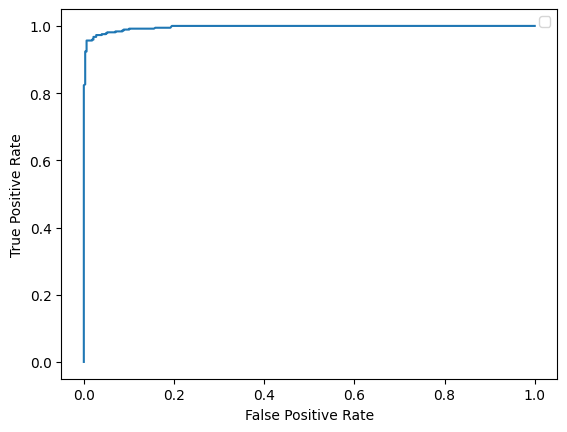

Confusion Matrix: 
[[321   7]
 [ 12 356]]
Accuracy Score: 
0.9727011494252874
Recall Score: 
0.967391304347826
Precision Score: 
0.9807162534435262
F1 Score: 
0.9740082079343365


In [7]:
from project1.utils.MetricsAnalyzer import MetricsAnalyzer
metrics = MetricsAnalyzer(clf, test['full_text'], test['root_label'], pos_label="sports")
metrics.print_all()